# FWD - Data Science Assessment

## 1 - Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2 - Data Loading

In [2]:
traffic_df = pd.read_csv('case_study_junior_ds.csv')

## 3 - Data Exploration

### 3.1 - Basic Exploration

In [3]:
# Visualization of the dataframe with a random sampling
traffic_df.sample(5)

,keyword_id,keyword_rank,date,searches,search_engine
360182,2310692417130,315482,2022-07-08,0,11
78141,68719904205,11939,2022-07-13,68480,1
124953,3289945028678,1961459,2022-07-08,0,4
364203,738734398340,124971,2022-07-09,1000,11
223696,635655214426,184709,2022-07-13,1000,5


In [4]:
# General overview of null values, data types and columns
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469308 entries, 0 to 469307
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   keyword_id     469308 non-null  int64 
 1   keyword_rank   469308 non-null  int64 
 2   date           469308 non-null  object
 3   searches       469308 non-null  int64 
 4   search_engine  469308 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 17.9+ MB


In [5]:
"""
In the examination of the dataframe, five fields with 469,308 records containing non-null values have been identified. 
It is observed that the 'Date' field is currently stored as an object. To enhance data manipulation and analysis, 
consideration is being given to converting it into a datetime format.
"""

traffic_df.date = pd.to_datetime(traffic_df.date)
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469308 entries, 0 to 469307
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   keyword_id     469308 non-null  int64         
 1   keyword_rank   469308 non-null  int64         
 2   date           469308 non-null  datetime64[ns]
 3   searches       469308 non-null  int64         
 4   search_engine  469308 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 17.9 MB


In [6]:
# The unique values for each field are examined, providing insights into the distinct counts of keyword_ids, dates, and search_engines. 
# This information is relevant for understanding the diversity within these fields.
traffic_df.nunique()

keyword_id       109143
keyword_rank     359306
date                  7
searches          24158
search_engine        26
dtype: int64

In [7]:
"""
Dataframe shows a standard deviation (std) of 1388063 for keyword_rank, which suggests a high spread of values. 
Also searches has a high std of 82795 and at least half of the searches have 0 as a value.
"""

traffic_df.describe()

,keyword_id,keyword_rank,date,searches,search_engine
count,4.693080e+05,4.693080e+05,469308,4.693080e+05,469308.000000
mean,1.955014e+12,7.439009e+05,2022-07-10 23:33:51.276687360,8.550373e+03,6.818188
min,5.850000e+03,3.000000e+00,2022-07-08 00:00:00,0.000000e+00,0.000000
25%,7.988642e+11,7.421850e+04,2022-07-09 00:00:00,0.000000e+00,3.000000
50%,1.838246e+12,2.360955e+05,2022-07-11 00:00:00,0.000000e+00,5.000000
75%,3.049427e+12,7.821010e+05,2022-07-13 00:00:00,3.000000e+03,10.000000
max,4.389457e+12,1.391182e+07,2022-07-14 00:00:00,1.863716e+07,25.000000
std,1.290018e+12,1.388063e+06,NaN,8.279563e+04,5.185202


In [8]:
"""
Dataframe contains data from 7 consecutive days
"""

set(traffic_df.date)

{Timestamp('2022-07-08 00:00:00'),
 Timestamp('2022-07-09 00:00:00'),
 Timestamp('2022-07-10 00:00:00'),
 Timestamp('2022-07-11 00:00:00'),
 Timestamp('2022-07-12 00:00:00'),
 Timestamp('2022-07-13 00:00:00'),
 Timestamp('2022-07-14 00:00:00')}

### 3.2 - Does a keyword_id appear in multiple search_engine?

ANSWER: As shown in the graph below, it seems that each keyword_id only for only one search engine and it is not present in others.

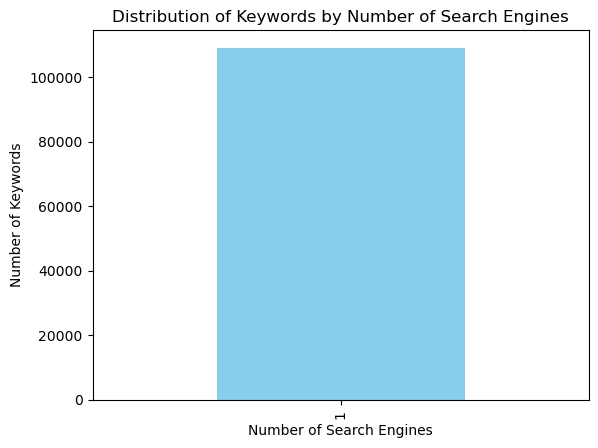

In [9]:
# Visualizes on a bar plot the distribution of keywords based on the number of unique search engines associated with each keyword_id. 
# Groups the DataFrame by 'keyword_id' and calculates the number of unique search engines for each 'keyword_id'
sengine_count = traffic_df.groupby('keyword_id')['search_engine'].nunique()

# Plots the outcome of the groupby and add the labels to the x, y axis and title.
sengine_count.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Number of Search Engines') 
plt.ylabel('Number of Keywords')       
plt.title('Distribution of Keywords by Number of Search Engines')

plt.show()


## 4- Data Transformation and Aggregation

In this section, achieving a balance between Rank and Search Volume is pursued by initially computing daily weighted ranks. This equilibrium is essential for extending the analysis to a weekly level and establishing the relative importance of each keyword within each search engine.

Why is this calculation important?

Calculating the weighted rank means looking at both a keyword's rank and how many searches it gets. This matters because a keyword might have a high rank, but if not many people search for it, it might not be as valuable. On the other hand, a keyword with a lower rank but lots of searches could be more important. So, the weighted rank helps us see the real importance of keywords by considering both their ranking and how popular they are.

### 4.1 - Calculating Daily Weighted Rank and Pivot Aggregation

In [10]:
# Creation of a new column with the weighted rank of each keyword per day.
traffic_df['wr_daily'] = traffic_df['keyword_rank']*traffic_df['searches']
traffic_df.head()

,keyword_id,keyword_rank,date,searches,search_engine,wr_daily
0,338145,25218,2022-07-08,53000,0,1336554000
1,366846,906743,2022-07-08,0,0,0
2,8590017696,136761,2022-07-08,7000,0,957327000
3,8590268435,60380,2022-07-08,20033,0,1209592540
4,17179954797,239930,2022-07-08,2000,0,479860000


In [11]:
# Creates a pivot table aggregating the sum of 'wr_daily' and 'searches' for the whole week.
traffic_pivot = pd.pivot_table(traffic_df, values=['wr_daily', 'searches'], index=['keyword_id', 'search_engine'], aggfunc='sum')

# Resets the index in order to simplify further data manipulation and analysis.
traffic_pivot = traffic_pivot.reset_index()

# Renames the columns to 'wr_week' and 'searches_week' for clarification.
traffic_pivot = traffic_pivot.rename(columns={'wr_daily': 'wr_week', 'searches': 'searches_week'})

traffic_pivot.sample(5)

,keyword_id,search_engine,searches_week,wr_week
74285,2791728931918,12,1000,81292000
61610,2241972984189,13,2000,885884000
83366,3195455865041,10,0,0
74437,2800318778957,8,1000,80346000
93257,3650722319370,11,377613,6777028468


### 4.2 - Understanding the keywords and search engines

To comprehend the significance of each search engine, it is beneficial to initiate the analysis by visualizing the influence of individual search engines on our data. 
This entails considering factors such as search volumes, occurrences of 0 searches, and other relevant metrics.

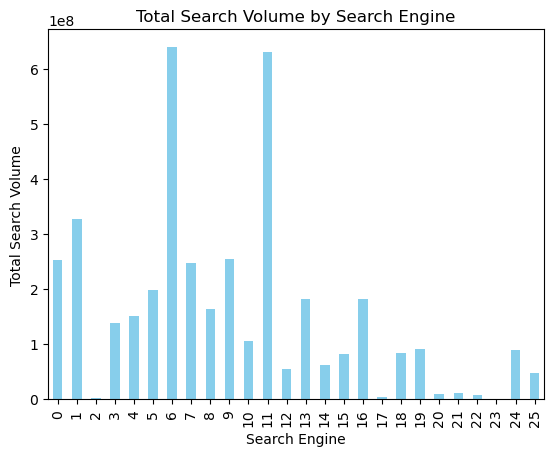

In [12]:
## PLOT 1: VOLUME BY SEARCH ENGINE

# Variable with the sum of searches for each search engine
volume_by_engine = traffic_df.groupby('search_engine')['searches'].sum()

# Plot a stacked bar graph
volume_by_engine.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Search Engine')
plt.ylabel('Total Search Volume')
plt.title('Total Search Volume by Search Engine')

# Displaying the plot
plt.show()

In [13]:
'''
During the exploratory analysis using .describe(), we observed that at least 50% of the searches have a value of 0. 
To maintain relevance and avoid divisions by zero in subsequent analyses and rankings, the decision is to identify and exclude these entries.
'''
# Creates a new column in our pivot dataframe that categorizes searches depending if they have or not any volume
traffic_pivot['has_searches'] = traffic_pivot['searches_week'] > 0
traffic_pivot.sample(5)

,keyword_id,search_engine,searches_week,wr_week,has_searches
26644,858993588040,4,2000,989152000,True
58473,2113123966576,3,1000,170841000,True
75550,2851858368915,4,0,0,False
9210,274877980152,8,27083,1062896602,True
68733,2551210591917,0,0,0,False


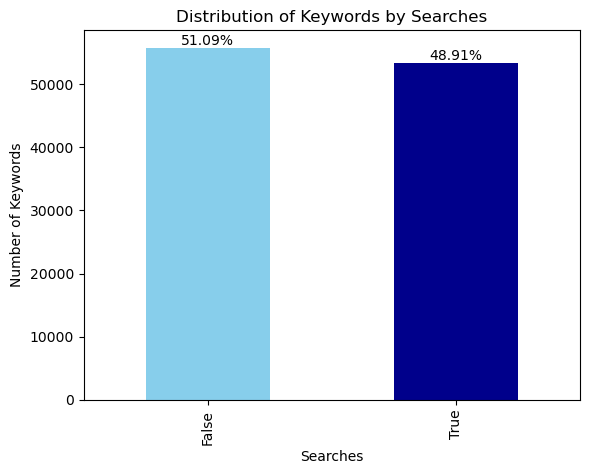

In [14]:
## PLOT 2: PERCENTAGE OF KEYWORDS WITH OR WITHOUT SEARCH VOLUME

# Counting the number of keywords with 0 searches and keywords with searches
searches_count = traffic_pivot['has_searches'].value_counts()
# Creating a bar plot
ax = searches_count.plot(kind='bar', color=['skyblue', 'darkblue'])

# Adding labels and title
plt.xlabel('Searches')
plt.ylabel('Number of Keywords')
plt.title('Distribution of Keywords by Searches')

# Adding percentage labels on each bar
total_keywords = searches_count.sum()
for i, count in enumerate(searches_count):
    percentage = (count / total_keywords) * 100
    ax.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')

# Displaying the plot
plt.show()

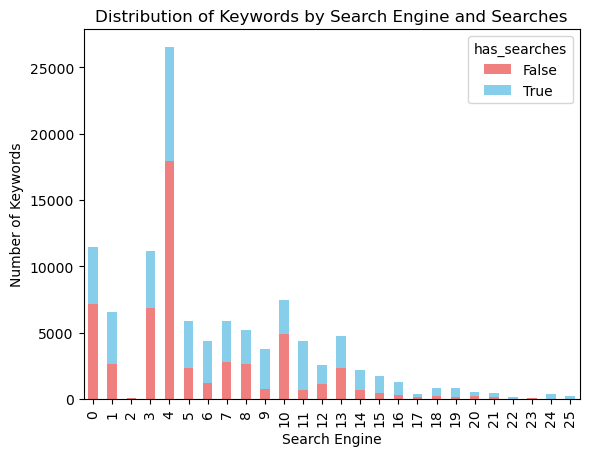

In [15]:
## PLOT 3: KEYWORDS ACCROSS SEARCH ENGINES ACCORDING TO ITS SEARCH VOLUME & STATUS

# Variable with counts of searches and no searches for each search engine
searches_counts = traffic_pivot.groupby(['search_engine', 'has_searches']).size().unstack(fill_value=0)

# Plot a stacked bar graph
searches_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'])

# Adding labels and title
plt.xlabel('Search Engine')
plt.ylabel('Number of Keywords')
plt.title('Distribution of Keywords by Search Engine and Searches')

# Displaying the plot
plt.show()

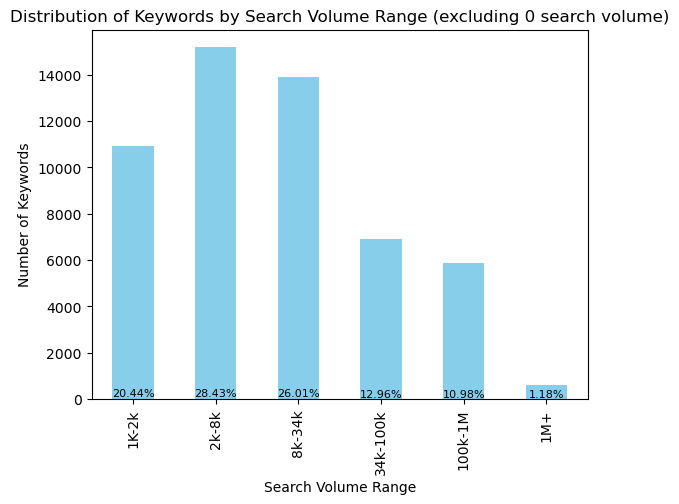

In [16]:
## PLOT 4: KEYWORDS BY SEARCH VOLUME RANGE

# Define the bins for search volume
bins = [1000, 2000, 8000, 34000, 100000, 1000000, float('inf')]

# Create labels for the bins
labels = ['1K-2k','2k-8k', '8k-34k', '34k-100k', '100k-1M', '1M+']

# Create a new column with the search volume range for each keyword
traffic_pivot['search_volume_range'] = pd.cut(traffic_pivot.loc[traffic_pivot['has_searches']==True, 'searches_week'], bins=bins, labels=labels, right=False)

# Count the number of keywords in each search volume range
volume_counts = traffic_pivot['search_volume_range'].value_counts().sort_index()

# Calculate percentages
volume_percentages = (volume_counts / len(traffic_pivot.loc[traffic_pivot['has_searches']==True])) * 100

# Create a bar plot
ax = volume_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Search Volume Range')
plt.ylabel('Number of Keywords')
plt.title('Distribution of Keywords by Search Volume Range (excluding 0 search volume)')

# Add percentage labels on top of each bar
for i, percentage in enumerate(volume_percentages):
    ax.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8, color='black')

# Displaying the plot
plt.show()

OBSERVATION: 

Upon reviewing the visualized data, it becomes evident that fewer than half of our keywords experienced any search volume throughout the week.

Notably, search engines 6 and 11 emerged as leaders in terms of search volume, while search engine 4 stood out for its significant contribution to keywords, whether they had searches or not.  

It's interesting to note that out of the keywords with search volume (49% of them), the majority (75%) have a volume of 34K or less, while only a small portion (12%) have more than 100K searches.

Let's narrow our focus to keywords that generated traffic and consequently obtained a weighted rank above 0!

### 4.3 - Calculating Weekly Weighted Average Rank for each entry

In [17]:
# Creates a new dataframe with only those keyword_id

yes_traffic_pivot= traffic_pivot.loc[traffic_pivot.has_searches==True, ['keyword_id', 'search_engine', 'searches_week', 'wr_week']].copy()

In [18]:
# Calculates the weekly weighted average rank. It divides the 'wr_week' (aggregated daily weighted rank) by the 'searches_week' column

yes_traffic_pivot['ww_avg_rank'] = round((yes_traffic_pivot['wr_week'] / yes_traffic_pivot['searches_week']),2)
yes_traffic_pivot.sample(5)

,keyword_id,search_engine,searches_week,wr_week,ww_avg_rank
14845,446677071645,15,8099,712491343,87972.76
27977,910533121189,0,1000,729631000,729631.00
60573,2199023303167,0,41760,5711034169,136758.48
84374,3238405740323,11,84000,4170799000,49652.37
4400,120259547858,0,7000,2391014000,341573.43


In [19]:
yes_traffic_pivot.describe()

,keyword_id,search_engine,searches_week,wr_week,ww_avg_rank
count,5.338300e+04,53383.000000,5.338300e+04,5.338300e+04,5.338300e+04
mean,1.911628e+12,7.228219,7.516922e+04,1.713891e+09,2.174755e+05
std,1.289359e+12,5.256564,4.820869e+05,2.193915e+09,4.536917e+05
min,8.341000e+03,0.000000,1.000000e+03,1.582000e+06,3.080000e+00
25%,7.559145e+11,4.000000,2.000000e+03,4.642900e+08,4.984523e+04
50%,1.760937e+12,6.000000,8.000000e+03,1.064721e+09,1.205700e+05
75%,2.997887e+12,11.000000,3.400000e+04,2.054646e+09,2.213070e+05
max,4.389457e+12,25.000000,5.002687e+07,1.259975e+11,1.367010e+07


#### 4.3.1 - Creating a Keyword Rank for each Search Engine

In [20]:
yes_traffic_pivot['rank']= yes_traffic_pivot.groupby('search_engine')['ww_avg_rank'].rank('dense')
yes_traffic_pivot.sample(10)

,keyword_id,search_engine,searches_week,wr_week,ww_avg_rank,rank
11044,326417911280,12,71121,956942927,13455.14,178.0
80815,3083786607006,25,1766815,327284561,185.24,9.0
67952,2516850897335,1,18071,5198916334,287693.89,1720.0
14545,438087065577,0,3000,1655162000,551720.67,2658.0
65746,2413771910257,4,1000,1041058000,1041058.00,8016.0
55351,1975685080951,15,27748,1359445196,48992.55,513.0
86423,3332894742152,4,3000,1199478000,399826.00,7405.0
100387,3977140173633,5,5000,629215000,125843.00,1545.0
82807,3169686022931,1,239999,9582083637,39925.51,302.0
76748,2903397960962,9,2000,364564000,182282.00,2366.0


In [21]:
yes_traffic_pivot.loc[yes_traffic_pivot['rank']==1.0, 
                      ['keyword_id', 'search_engine', 'searches_week', 'ww_avg_rank','rank']
                     ].sort_values(['search_engine'])

,keyword_id,search_engine,searches_week,ww_avg_rank,rank
9627,283468093540,0,9512016,299.91,1.0
22380,704374905883,1,19481897,78.26,1.0
93175,3650722206274,2,85040,13813.10,1.0
103954,4148938482137,3,3478171,142.36,1.0
10519,309238066050,4,8062389,18.19,1.0
14620,446676669250,5,4512026,99.78,1.0
32723,1073742334476,6,33569733,28.72,1.0
12342,369367302479,7,8880784,80.35,1.0
46356,1606317975332,8,9485243,7.87,1.0
33123,1090922017637,9,6259970,133.48,1.0


In [22]:
def retrieve_searches(rank):
    """
    Retrieves and prints data for keywords with a specific rank.

    Parameters:
    - rank (float): The desired rank.
    """
    result_df = yes_traffic_pivot.loc[yes_traffic_pivot['rank'] == rank, 
                                      ['keyword_id', 'search_engine', 'searches_week', 'ww_avg_rank', 'rank']
                                     ].sort_values(['search_engine'])

    # Print information for each search engine
    for _, row in result_df.iterrows():
        searches_with_separator = '{:,}'.format(int(row['searches_week']))
        print(f"SE {int(row['search_engine'])} has for its {rank} rank keyworkd {searches_with_separator} searches.\n")
    return

## 5 - Answering: How many searches does the keyword with rank 1 receive for each search engine?

In [23]:
print(retrieve_searches(1))

SE 0 has for its 1 rank keyworkd 9,512,016 searches.

SE 1 has for its 1 rank keyworkd 19,481,897 searches.

SE 2 has for its 1 rank keyworkd 85,040 searches.

SE 3 has for its 1 rank keyworkd 3,478,171 searches.

SE 4 has for its 1 rank keyworkd 8,062,389 searches.

SE 5 has for its 1 rank keyworkd 4,512,026 searches.

SE 6 has for its 1 rank keyworkd 33,569,733 searches.

SE 7 has for its 1 rank keyworkd 8,880,784 searches.

SE 8 has for its 1 rank keyworkd 9,485,243 searches.

SE 9 has for its 1 rank keyworkd 6,259,970 searches.

SE 10 has for its 1 rank keyworkd 4,134,516 searches.

SE 11 has for its 1 rank keyworkd 50,026,868 searches.

SE 12 has for its 1 rank keyworkd 1,280,067 searches.

SE 13 has for its 1 rank keyworkd 29,706,897 searches.

SE 14 has for its 1 rank keyworkd 2,420,435 searches.

SE 15 has for its 1 rank keyworkd 2,621,526 searches.

SE 16 has for its 1 rank keyworkd 13,000,965 searches.

SE 17 has for its 1 rank keyworkd 257,261 searches.

SE 18 has for its 1 